In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import six

In [3]:
flange_raw = pd.read_csv('data/flange_raw.txt')

In [4]:
flange_raw = flange_raw.drop(columns=['No','Total_flange'])

# Data input

In [42]:
flange30 = pd.read_csv('data/flange_30.txt')
flange40 = pd.read_csv('data/flange_40.txt')
flange50 = pd.read_csv('data/flange_50.txt')
flange60 = pd.read_csv('data/flange_60.txt')
flange70 = pd.read_csv('data/flange_70.txt')
flange80 = pd.read_csv('data/flange_80.txt')
flange90 = pd.read_csv('data/flange_90.txt')

In [43]:
x_flange30 = flange30.drop(columns = ['flange_usage'])
x_flange40 = flange40.drop(columns = ['flange_usage'])
x_flange50 = flange50.drop(columns = ['flange_usage'])
x_flange60 = flange60.drop(columns = ['flange_usage'])
x_flange70 = flange70.drop(columns = ['flange_usage'])
x_flange80 = flange80.drop(columns = ['flange_usage'])
x_flange90 = flange90.drop(columns = ['flange_usage'])

In [44]:
y_flange30 = pd.DataFrame(flange30, columns = ['flange_usage'])
y_flange40 = pd.DataFrame(flange40, columns = ['flange_usage'])
y_flange50 = pd.DataFrame(flange50, columns = ['flange_usage'])
y_flange60 = pd.DataFrame(flange60, columns = ['flange_usage'])
y_flange70 = pd.DataFrame(flange70, columns = ['flange_usage'])
y_flange80 = pd.DataFrame(flange80, columns = ['flange_usage'])
y_flange90 = pd.DataFrame(flange90, columns = ['flange_usage'])

In [52]:
flange_test = pd.read_csv('data/flange_test.txt')

In [53]:
flange_test

,L,B,D,T,DWT,SC,OP,GP,WP,CREW,WD,TLWT,Total_flange
0,285,60,32,24,340660,2,0,400,1,100,1010,23000,1085
1,319,56,30,20,255271,2,0,71,0,110,1260,14500,1019
2,305,61,32,24,350000,2,0,250,0,240,1200,37478,1371


# Corration

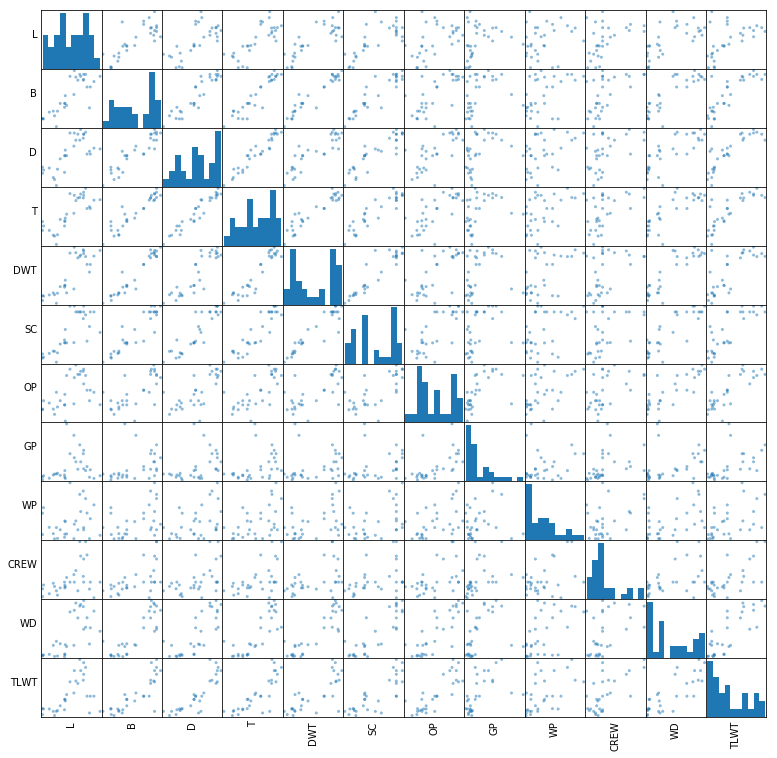

In [5]:
axs = pd.plotting.scatter_matrix(flange_raw, figsize=(13,13))
n=len(flange_raw.columns)
for i in range(n):
    v = axs[i,0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1,i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [6]:
flange_raw.corr()

,L,B,D,T,DWT,SC,OP,GP,WP,CREW,WD,TLWT
L,1.000000,0.800507,0.708220,0.787409,0.831970,0.759617,0.498982,0.251088,0.219355,0.437695,0.689074,0.522639
B,0.800507,1.000000,0.921968,0.935546,0.960828,0.918393,0.707053,0.378457,0.460599,0.576606,0.860151,0.831618
D,0.708220,0.921968,1.000000,0.959301,0.883952,0.899125,0.737340,0.446433,0.454727,0.519198,0.786949,0.863230
T,0.787409,0.935546,0.959301,1.000000,0.935242,0.914190,0.740323,0.389185,0.502902,0.554862,0.816102,0.821027
DWT,0.831970,0.960828,0.883952,0.935242,1.000000,0.931129,0.714035,0.252682,0.481123,0.489570,0.888393,0.767432
SC,0.759617,0.918393,0.899125,0.914190,0.931129,1.000000,0.736439,0.326827,0.460806,0.428039,0.855559,0.821997
OP,0.498982,0.707053,0.737340,0.740323,0.714035,0.736439,1.000000,0.588084,0.533555,0.512096,0.829256,0.837969
GP,0.251088,0.378457,0.446433,0.389185,0.252682,0.326827,0.588084,1.000000,0.176115,0.408020,0.402254,0.561381
WP,0.219355,0.460599,0.454727,0.502902,0.481123,0.460806,0.533555,0.176115,1.000000,0.407635,0.563393,0.526544
CREW,0.437695,0.576606,0.519198,0.554862,0.489570,0.428039,0.512096,0.408020,0.407635,1.000000,0.482154,0.677164


# Regression in Time domain

In [24]:
flange_time = pd.read_csv('data/flange_time.txt')
test_time = pd.read_csv('data/time_test.csv')

In [23]:
x_flange_time = pd.DataFrame(flange_time, columns=['time'])
y_flange_time = pd.DataFrame(flange_time, columns=['flange_usage'])

In [25]:
linear_regressor_time = LinearRegression()
linear_model_time = linear_regressor_time.fit(x_flange_time,y_flange_time)
linear_predict_time = linear_model_time.predict(test_time)

In [26]:
poly_2nd_time = Pipeline([('poly',PolynomialFeatures(degree=2)),('linear',LinearRegression(fit_intercept=False))])
poly_2nd_model_time = poly_2nd_time.fit(x_flange_time,y_flange_time)
poly_2nd_predict_time = poly_2nd_model_time.predict(test_time)

In [31]:
poly_3rd_time = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression(fit_intercept=False))])
poly_3rd_model_time = poly_3rd_time.fit(x_flange_time,y_flange_time)
poly_3rd_predict_time = poly_3rd_model_time.predict(test_time)

In [33]:
poly_4th_time = Pipeline([('poly',PolynomialFeatures(degree=4)),('linear',LinearRegression(fit_intercept=False))])
poly_4th_model_time = poly_4th_time.fit(x_flange_time,y_flange_time)
poly_4th_predict_time = poly_4th_model_time.predict(test_time)

In [35]:
poly_5th_time = Pipeline([('poly',PolynomialFeatures(degree=5)),('linear',LinearRegression(fit_intercept=False))])
poly_5th_model_time = poly_5th_time.fit(x_flange_time,y_flange_time)
poly_5th_predict_time = poly_5th_model_time.predict(test_time)

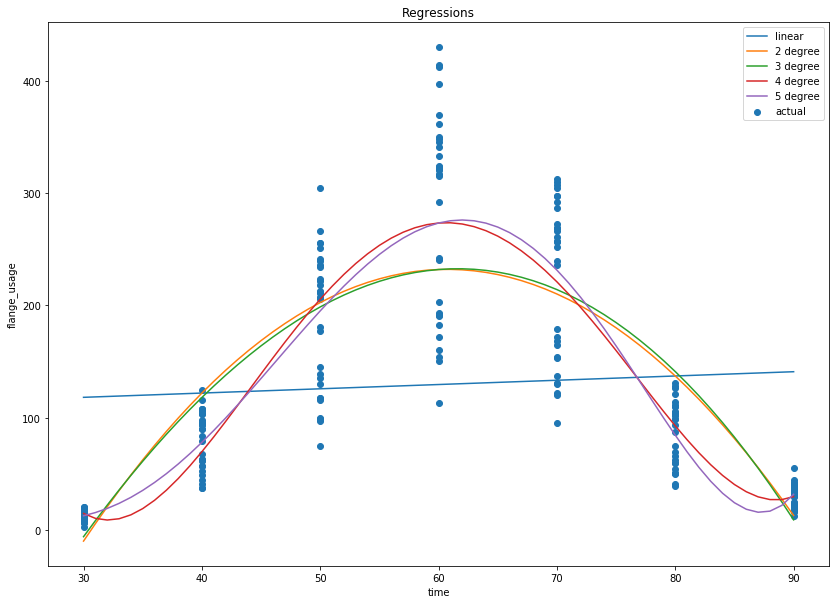

In [37]:
plt.figure(figsize=(14,10))
plt.scatter(flange_time.time,flange_time.flange_usage,label='actual')
plt.plot(test_time, linear_predict_time, label = 'linear')
plt.plot(test_time,poly_2nd_predict_time, label = '2 degree')
plt.plot(test_time,poly_3rd_predict_time,label='3 degree')
plt.plot(test_time,poly_4th_predict_time,label='4 degree')
plt.plot(test_time,poly_5th_predict_time,label='5 degree')
plt.xlabel("time")
plt.ylabel("flange_usage")
plt.legend(loc="best")
plt.title("Regressions")
plt.show()

# Linear Regression

In [54]:
linear_regressor_30 = LinearRegression()
linear_regressor_40 = LinearRegression()
linear_regressor_50 = LinearRegression()
linear_regressor_60 = LinearRegression()
linear_regressor_70 = LinearRegression()
linear_regressor_80 = LinearRegression()
linear_regressor_90 = LinearRegression()

In [55]:
linear_model_flange30 = linear_regressor_30.fit(x_flange30,y_flange30)
linear_model_flange40 = linear_regressor_40.fit(x_flange40,y_flange40)
linear_model_flange50 = linear_regressor_50.fit(x_flange50,y_flange50)
linear_model_flange60 = linear_regressor_60.fit(x_flange60,y_flange60)
linear_model_flange70 = linear_regressor_70.fit(x_flange70,y_flange70)
linear_model_flange80 = linear_regressor_80.fit(x_flange80,y_flange80)
linear_model_flange90 = linear_regressor_90.fit(x_flange90,y_flange90)

In [56]:
flange30_prediction_linear = linear_model_flange30.predict(flange_test)
flange40_prediction_linear = linear_model_flange40.predict(flange_test)
flange50_prediction_linear = linear_model_flange50.predict(flange_test)
flange60_prediction_linear = linear_model_flange60.predict(flange_test)
flange70_prediction_linear = linear_model_flange70.predict(flange_test)
flange80_prediction_linear = linear_model_flange80.predict(flange_test)
flange90_prediction_linear = linear_model_flange90.predict(flange_test)

In [57]:
print(flange30_prediction_linear)
print(flange40_prediction_linear)
print(flange50_prediction_linear
print(flange60_prediction_linear)
print(flange70_prediction_linear)
print(flange80_prediction_linear)
print(flange90_prediction_linear)

[[16.55209631]
 [15.57706087]
 [12.75452405]]
[[109.9439097 ]
 [ 99.31707352]
 [114.73459023]]
[[237.31897629]
 [203.25945466]
 [290.55926832]]
[[333.91376406]
 [304.89870056]
 [441.36762006]]
[[237.18130015]
 [266.13195476]
 [326.11719695]]
[[ 97.54326936]
 [ 97.81355213]
 [129.9369317 ]]
[[52.54668414]
 [32.00220351]
 [55.52986868]]


# 2nd Degree Poly Regression

In [71]:
poly_2nd_30 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [72]:
poly_2nd_model_flange30 = poly_2nd_30.fit(x_flange30,y_flange30)
poly_2nd_model_flange40 = poly_2nd_40.fit(x_flange40,y_flange40)
poly_2nd_model_flange50 = poly_2nd_50.fit(x_flange50,y_flange50)
poly_2nd_model_flange60 = poly_2nd_60.fit(x_flange60,y_flange60)
poly_2nd_model_flange70 = poly_2nd_70.fit(x_flange70,y_flange70)
poly_2nd_model_flange80 = poly_2nd_80.fit(x_flange80,y_flange80)
poly_2nd_model_flange90 = poly_2nd_90.fit(x_flange90,y_flange90)

In [73]:
flange30_prediction_poly_2nd = poly_2nd_model_flange30.predict(flange_test)
flange40_prediction_poly_2nd = poly_2nd_model_flange40.predict(flange_test)
flange50_prediction_poly_2nd = poly_2nd_model_flange50.predict(flange_test)
flange60_prediction_poly_2nd = poly_2nd_model_flange60.predict(flange_test)
flange70_prediction_poly_2nd = poly_2nd_model_flange70.predict(flange_test)
flange80_prediction_poly_2nd = poly_2nd_model_flange80.predict(flange_test)
flange90_prediction_poly_2nd = poly_2nd_model_flange90.predict(flange_test)

In [74]:
print(flange30_prediction_poly_2nd)
print(flange40_prediction_poly_2nd)
print(flange50_prediction_poly_2nd)
print(flange60_prediction_poly_2nd)
print(flange70_prediction_poly_2nd)
print(flange80_prediction_poly_2nd)
print(flange90_prediction_poly_2nd) 

[[-7.9697608 ]
 [-8.69122865]
 [ 9.88172724]]
[[159.70477771]
 [ 55.12018871]
 [157.00126789]]
[[214.46042024]
 [  2.61553436]
 [116.82313858]]
[[350.88199179]
 [367.07144589]
 [430.79143159]]
[[236.80967687]
 [ 70.91330854]
 [244.9210982 ]]
[[122.56785056]
 [ 80.43258957]
 [143.92407939]]
[[45.61026113]
 [37.14495143]
 [45.08061138]]


# 3rd Degree Poly Regression

In [83]:
poly_3rd_30 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [84]:
poly_3rd_model_flange30 = poly_3rd_30.fit(x_flange30,y_flange30)
poly_3rd_model_flange40 = poly_3rd_40.fit(x_flange40,y_flange40)
poly_3rd_model_flange50 = poly_3rd_50.fit(x_flange50,y_flange50)
poly_3rd_model_flange60 = poly_3rd_60.fit(x_flange60,y_flange60)
poly_3rd_model_flange70 = poly_3rd_70.fit(x_flange70,y_flange70)
poly_3rd_model_flange80 = poly_3rd_80.fit(x_flange80,y_flange80)
poly_3rd_model_flange90 = poly_3rd_90.fit(x_flange90,y_flange90)

In [85]:
flange30_prediction_poly_3rd = poly_3rd_model_flange30.predict(flange_test)
flange40_prediction_poly_3rd = poly_3rd_model_flange40.predict(flange_test)
flange50_prediction_poly_3rd = poly_3rd_model_flange50.predict(flange_test)
flange60_prediction_poly_3rd = poly_3rd_model_flange60.predict(flange_test)
flange70_prediction_poly_3rd = poly_3rd_model_flange70.predict(flange_test)
flange80_prediction_poly_3rd = poly_3rd_model_flange80.predict(flange_test)
flange90_prediction_poly_3rd = poly_3rd_model_flange90.predict(flange_test)

In [86]:
print(flange30_prediction_poly_3rd)
print(flange40_prediction_poly_3rd)
print(flange50_prediction_poly_3rd)
print(flange60_prediction_poly_3rd)
print(flange70_prediction_poly_3rd)
print(flange80_prediction_poly_3rd)
print(flange90_prediction_poly_3rd)

[[-31.14832857]
 [-44.34474209]
 [ 59.5067871 ]]
[[319.03400326]
 [ 77.05747017]
 [455.41005692]]
[[ 380.70310642]
 [-285.88946156]
 [ -35.94212646]]
[[ 245.81131473]
 [ 187.27726242]
 [-279.9040599 ]]
[[406.88827656]
 [-92.78226507]
 [369.55686296]]
[[240.86008424]
 [ 56.20818457]
 [170.98621698]]
[[69.39802942]
 [-8.73972933]
 [14.33294415]]
